## Васильев Семён. 520 группа

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.tsa.stattools as st

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def autocorr(ts, lags=15):
    fig, ax = plt.subplots(figsize=(14, 7))
    sm.graphics.tsa.plot_acf(ts, lags=lags, ax=ax, adjusted=True, alpha=0.05)
    plt.show()

In [3]:
def autopartcorr(ts, lags=15):
    fig, ax = plt.subplots(figsize=(14, 7))
    sm.graphics.tsa.plot_pacf(ts, lags=lags, ax=ax, alpha=0.05)
    plt.show()

Загрузка данных.

In [4]:
data = pd.read_csv('Test_variant_3.csv')

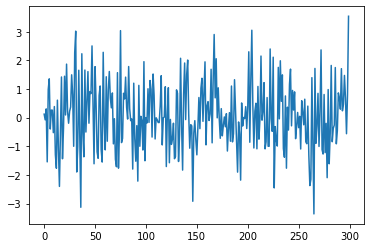

In [5]:
plt.plot(data)

Оценка ACF и PACF.

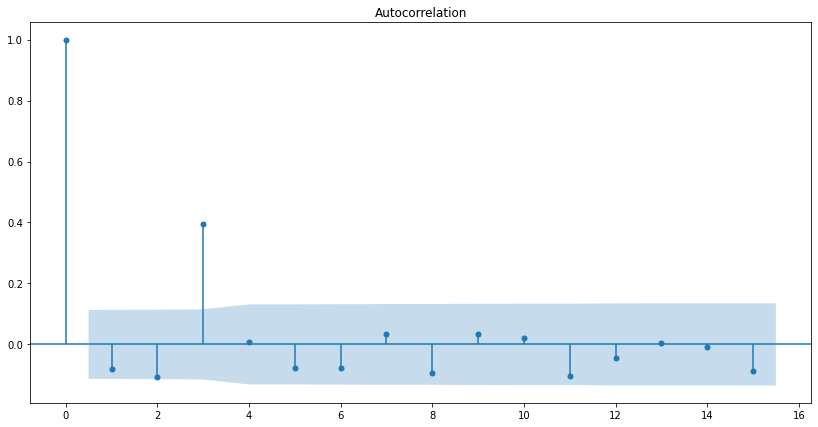

In [6]:
autocorr(data)

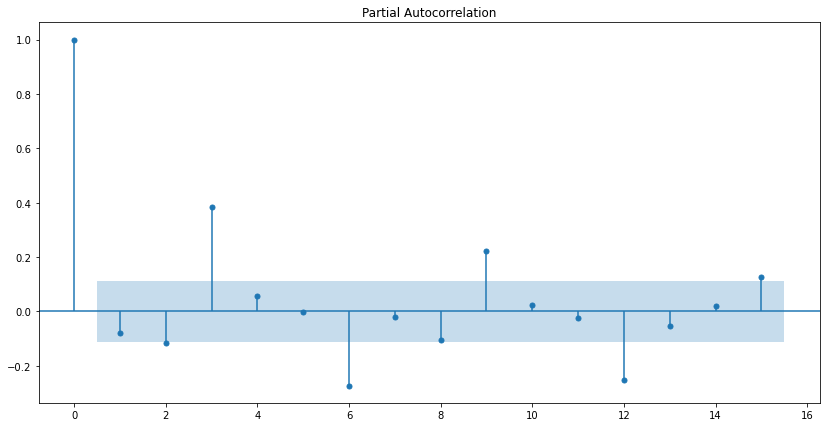

In [7]:
autopartcorr(data)

Модель можно проидентифицировать как MA(3), AR(3) или AR(6) ???

In [9]:
ma3 = sm.tsa.ARMA(data, order=(0, 3)).fit(method='MLE')

/home/svasilyev/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [10]:
ar3 = sm.tsa.ARMA(data, order=(3, 0)).fit(method='MLE')

In [11]:
ar6 = sm.tsa.ARMA(data, order=(6, 0)).fit(method='MLE')

In [15]:
ma3.aic, ar3.aic, ar6.aic

(834.497076117017, 914.0267722214294, 895.0687960189259)

In [16]:
ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      x   No. Observations:                  300
Model:                     ARMA(0, 3)   Log Likelihood                -412.249
Method:                           mle   S.D. of innovations              0.949
Date:                Thu, 03 Mar 2022   AIC                            834.497
Time:                        16:02:34   BIC                            853.016
Sample:                             0   HQIC                           841.908
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0684      0.101      0.678      0.498      -0.129       0.266
ma.L1.x       -0.0272      0.029     -0.943      0.346      -0.084       0.029
ma.L2.x       -0.0060      0.030     -0.200      0.842      -0.065       0.053
ma.L3.x        0.8843      0.026     33.539      0.000       0.833       0.936
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.5281           -0.8937j            1.0381           -0.1651
MA.2            0.5281           +0.8937j            1.0381            0.1651
MA.3           -1.0494           -0.0000j            1.0494           -0.5000
-----------------------------------------------------------------------------
"""

In [18]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [19]:
acorr_ljungbox(ma3.resid, lags=[6], return_df=True, model_df=2)

,lb_stat,lb_pvalue
6,5.788739,0.215491


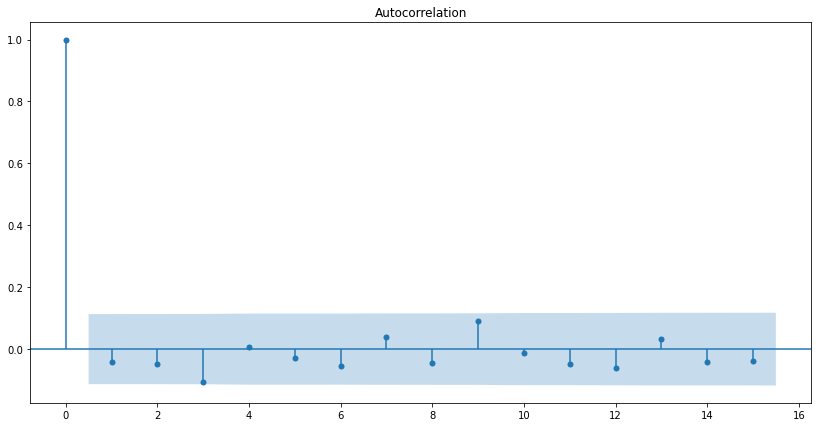

In [20]:
autocorr(ma3.resid)

In [21]:
from statsmodels.stats.stattools import durbin_watson

In [22]:
durbin_watson(ma3.resid)

2.0562177640404053